<a href="https://colab.research.google.com/github/LuciferAsh98/AI-ML-Learning-Path/blob/main/RandomForestSample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1:** Load the Correct Files

In [9]:
import pandas as pd

# Load the datasets
train_df = pd.read_csv('cyber-threat-intelligence-splited_train.csv')
validate_df = pd.read_csv('cyber-threat-intelligence-splited_validate.csv')
test_df = pd.read_csv('cyber-threat-intelligence-splited_test.csv')

# Display the first few rows of each dataset
print("Training Data:")
print(train_df.head())
print("\nValidation Data:")
print(validate_df.head())
print("\nTest Data:")
print(test_df.head())


Training Data:
   Unnamed: 0  index                                               text  \
0           0  11709  Malicious version of My First APP, which adds ...   
1           1   4382  HYPERSCRAPE demonstrates Charming Kitten’s com...   
2           2  12581  This looked similar to an earlier in-the-wild ...   
3           3  11292  We need to request that a download link be gen...   
4           4  13494  Some malicious actors, such as ransomware oper...   

                                            entities relations Comments  \
0  [{'id': 36090, 'label': 'malware', 'start_offs...        []       []   
1  [{'id': 13145, 'label': 'threat-actor', 'start...        []       []   
2                                                 []        []       []   
3                                                 []        []       []   
4                                                 []        []       []   

        id         label  start_offset  end_offset  
0  36090.0       malware      

**Step 2:** Data Preprocessing

**Step 3.1:** Tokenizing the text

In [10]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Parameters
max_words = 10000  # Maximum number of words to keep, based on word frequency
max_len = 100  # Maximum length of sequences

# Tokenize the text
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_df['text'])

# Convert text to sequences
train_sequences = tokenizer.texts_to_sequences(train_df['text'])
validate_sequences = tokenizer.texts_to_sequences(validate_df['text'])
test_sequences = tokenizer.texts_to_sequences(test_df['text'])

# Pad sequences to ensure uniform input length
x_train = pad_sequences(train_sequences, maxlen=max_len)
x_validate = pad_sequences(validate_sequences, maxlen=max_len)
x_test = pad_sequences(test_sequences, maxlen=max_len)

# Print the shape of the data
print("Training data shape:", x_train.shape)
print("Validation data shape:", x_validate.shape)
print("Test data shape:", x_test.shape)


Training data shape: (6812, 100)
Validation data shape: (1460, 100)
Test data shape: (1460, 100)


**Step 3.2:** Creating Input Features and Labels

In [11]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Extract labels
y_train = train_df['label']
y_validate = validate_df['label']
y_test = test_df['label']

# Encode the labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_validate = label_encoder.transform(y_validate)
y_test = label_encoder.transform(y_test)

# Convert labels to categorical (one-hot encoding)
y_train = to_categorical(y_train)
y_validate = to_categorical(y_validate)
y_test = to_categorical(y_test)

# Print the shape of the labels
print("Training labels shape:", y_train.shape)
print("Validation labels shape:", y_validate.shape)
print("Test labels shape:", y_test.shape)


Training labels shape: (6812, 21)
Validation labels shape: (1460, 21)
Test labels shape: (1460, 21)


**Step 4:** Building the Neural Network Model

**Step 4.1:** Determine the maximum sequence length from the 'text' column:

In [13]:
# Extract text features from training data
train_texts = train_df['text']

# Determine the maximum sequence length in the training data
max_length = train_texts.apply(lambda x: len(x.split())).max()

print(f"Maximum sequence length: {max_length}")


Maximum sequence length: 323


**Step 4.2:** Define and compile the model:

In [14]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

# Define the model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=64, input_length=323))  # Using max_length = 323
model.add(LSTM(64))
model.add(Dense(21, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 323, 64)           320000    
                                                                 
 lstm (LSTM)                 (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 21)                1365      
                                                                 
Total params: 354389 (1.35 MB)
Trainable params: 354389 (1.35 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Step 5:** Tokenize and pad the text data

In [15]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Initialize the tokenizer
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_df['text'])

# Convert text data to sequences
train_sequences = tokenizer.texts_to_sequences(train_df['text'])
validate_sequences = tokenizer.texts_to_sequences(validate_df['text'])
test_sequences = tokenizer.texts_to_sequences(test_df['text'])

# Pad the sequences
train_padded = pad_sequences(train_sequences, maxlen=323)
validate_padded = pad_sequences(validate_sequences, maxlen=323)
test_padded = pad_sequences(test_sequences, maxlen=323)


**Step 6:** Fit the model to the training data

In [19]:
# Check variable names for labels
print("Available variables:")
print(dir())




Available variables:
['Dense', 'Embedding', 'In', 'LSTM', 'LabelEncoder', 'Out', 'Sequential', 'Tokenizer', '_', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__package__', '__spec__', '_dh', '_i', '_i1', '_i10', '_i11', '_i12', '_i13', '_i14', '_i15', '_i16', '_i17', '_i18', '_i19', '_i2', '_i3', '_i4', '_i5', '_i6', '_i7', '_i8', '_i9', '_ih', '_ii', '_iii', '_oh', 'exit', 'get_ipython', 'label_encoder', 'max_len', 'max_length', 'max_words', 'model', 'pad_sequences', 'pd', 'quit', 'test_df', 'test_padded', 'test_sequences', 'to_categorical', 'tokenizer', 'train_df', 'train_padded', 'train_sequences', 'train_texts', 'validate_df', 'validate_padded', 'validate_sequences', 'x_test', 'x_train', 'x_validate', 'y_test', 'y_train', 'y_validate']


In [20]:
# Fit the model to the training data
history = model.fit(
    train_padded,
    y_train,
    epochs=10,
    batch_size=32,
    validation_data=(validate_padded, y_validate)
)


Epoch 1/10
213/213 [==============================] - 49s 219ms/step - loss: 1.8970 - accuracy: 0.5068 - val_loss: 1.5635 - val_accuracy: 0.5692
Epoch 2/10
213/213 [==============================] - 49s 229ms/step - loss: 1.5577 - accuracy: 0.5521 - val_loss: 1.5090 - val_accuracy: 0.5719
Epoch 3/10
213/213 [==============================] - 46s 214ms/step - loss: 1.3821 - accuracy: 0.5895 - val_loss: 1.4737 - val_accuracy: 0.5938
Epoch 4/10
213/213 [==============================] - 46s 214ms/step - loss: 1.1765 - accuracy: 0.6585 - val_loss: 1.4613 - val_accuracy: 0.6130
Epoch 5/10
213/213 [==============================] - 46s 218ms/step - loss: 0.9806 - accuracy: 0.7198 - val_loss: 1.4315 - val_accuracy: 0.6137
Epoch 6/10
213/213 [==============================] - 48s 225ms/step - loss: 0.8091 - accuracy: 0.7720 - val_loss: 1.4042 - val_accuracy: 0.6363
Epoch 7/10
213/213 [==============================] - 46s 214ms/step - loss: 0.6523 - accuracy: 0.8180 - val_loss: 1.4243 - val_ac

**Step 7:**  Plot training and validation loss & accuracy

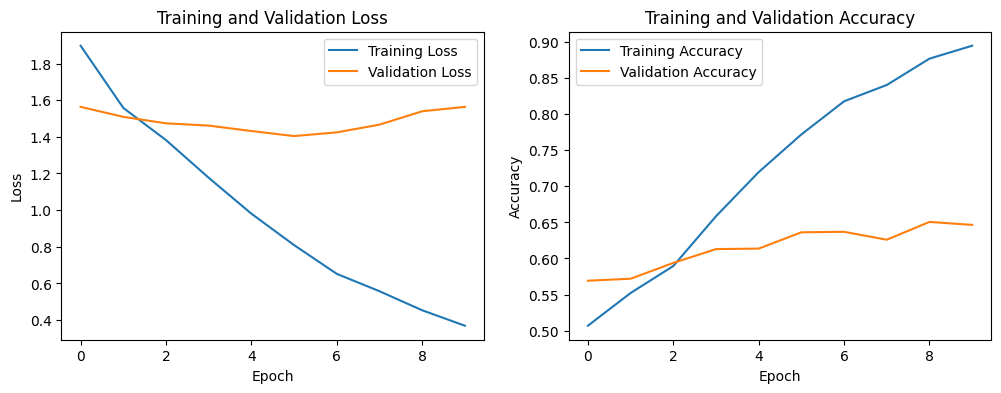

In [21]:
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()


In [22]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_padded, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Make predictions on the test data
test_predictions = model.predict(test_padded)

# You can now analyze the predictions or calculate additional metrics as needed


46/46 [==============================] - 5s 104ms/step - loss: 1.7007 - accuracy: 0.6329
Test Loss: 1.7006819248199463
Test Accuracy: 0.6328766942024231
46/46 [==============================] - 6s 117ms/step


In [23]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_padded, y_test)
test_loss, test_accuracy


46/46 [==============================] - 6s 127ms/step - loss: 1.7007 - accuracy: 0.6329


(1.7006819248199463, 0.6328766942024231)